In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv('../results-Montreal.csv')
# extract the last term of Unnamed:0 before .qasm and after the last _ and convert to int
df['opt'] = df['Unnamed: 0'].str.split('_').str[-1].str.split('.').str[0].astype(int)
# the file name file is a str containing Unnamed: 0 without the last part after the last 2 _
df['file'] = df['Unnamed: 0'].str.split('_').str[:-2].str.join('_')


In [3]:
df

,Unnamed: 0,0,opt,file
0,qnn_nativegates_rigetti_qiskit_opt3_5_opt_0.qasm,0.120117,0,qnn_nativegates_rigetti_qiskit_opt3_5
1,qnn_nativegates_rigetti_qiskit_opt3_5_opt_1.qasm,0.310547,1,qnn_nativegates_rigetti_qiskit_opt3_5
2,qnn_nativegates_rigetti_qiskit_opt3_5_opt_2.qasm,0.310547,2,qnn_nativegates_rigetti_qiskit_opt3_5
3,qnn_nativegates_rigetti_qiskit_opt3_5_opt_3.qasm,0.349609,3,qnn_nativegates_rigetti_qiskit_opt3_5
4,grover-noancilla_nativegates_quantinuum_qiskit...,0.102539,0,grover-noancilla_nativegates_quantinuum_qiskit...
...,...,...,...,...
17063,qaoa_nativegates_rigetti_qiskit_opt0_10_opt_3....,0.320312,3,qaoa_nativegates_rigetti_qiskit_opt0_10
17064,qpeinexact_nativegates_ionq_tket_10_opt_0.qasm,0.001953,0,qpeinexact_nativegates_ionq_tket_10
17065,qpeinexact_nativegates_ionq_tket_10_opt_1.qasm,0.018555,1,qpeinexact_nativegates_ionq_tket_10
17066,qpeinexact_nativegates_ionq_tket_10_opt_2.qasm,0.090820,2,qpeinexact_nativegates_ionq_tket_10


/tmp/ipykernel_1791955/2223944430.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='opt', y='0', palette=palette)
/tmp/ipykernel_1791955/2223944430.py:4: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(data=df, x='opt', y='0', palette=palette)


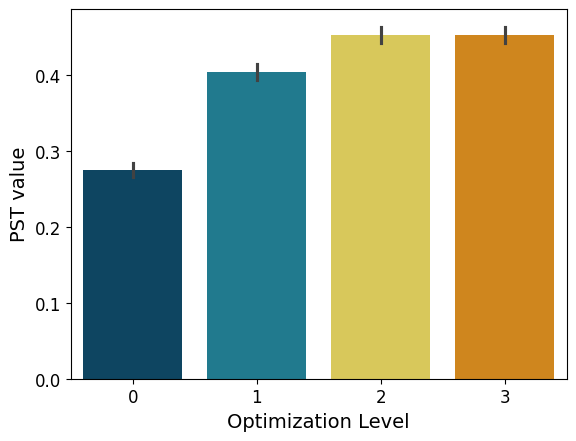

In [4]:
from pypalettes import load_cmap
cmap = load_cmap("Bay")
palette = cmap.colors
sns.barplot(data=df, x='opt', y='0', palette=palette)
plt.xlabel('Optimization Level', fontsize=14)
plt.ylabel('PST value', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig('pst-Geneva.pdf', bbox_inches='tight')

/tmp/ipykernel_1791955/4246603362.py:16: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df, x='file', y='min_value', palette=palette, marker='o')
/tmp/ipykernel_1791955/4246603362.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=df, x='file', y='max_value', palette=palette, marker='o')


<Axes: xlabel='file', ylabel='min_value'>

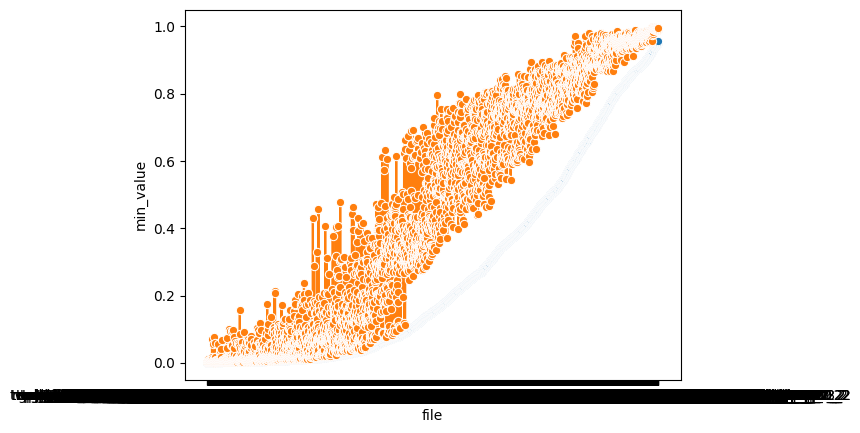

In [ ]:
# for each element file find the minimum value and the maximum value column 0 and report the corresponding optimiazion level
min_values = df.groupby('file')['0'].min().reset_index()
max_values = df.groupby('file')['0'].max().reset_index()
min_values = min_values.rename(columns={'0': 'min_value'})
max_values = max_values.rename(columns={'0': 'max_value'})
# merge the min and max values with the original dataframe
df = df.merge(min_values, on='file')
df = df.merge(max_values, on='file')
# find the optimization level corresponding to the min and max value
#df['min_opt'] = df.apply(lambda row: row['opt'] if row['0'] == row['min_value'] else np.nan, axis=1)
#df['max_opt'] = df.apply(lambda row: row['opt'] if row['0'] == row['max_value'] else np.nan, axis=1)
# drop the rows where min_opt or max_opt is NaN
#df = df.dropna(subset=['min_opt', 'max_opt'])
df.sort_values(by='min_value', inplace=True)
# keep only the file and the min_opt and max_opt columns
sns.lineplot(data=df, x='file', y='min_value', palette=palette, marker='o')
sns.lineplot(data=df, x='file', y='max_value', palette=palette, marker='o')
plt.xlabel('File', fontsize=14)
